**Chapter 14 - Probability Rules!**

**Five Rules for Probability**

(so simple that even your cat can understand them)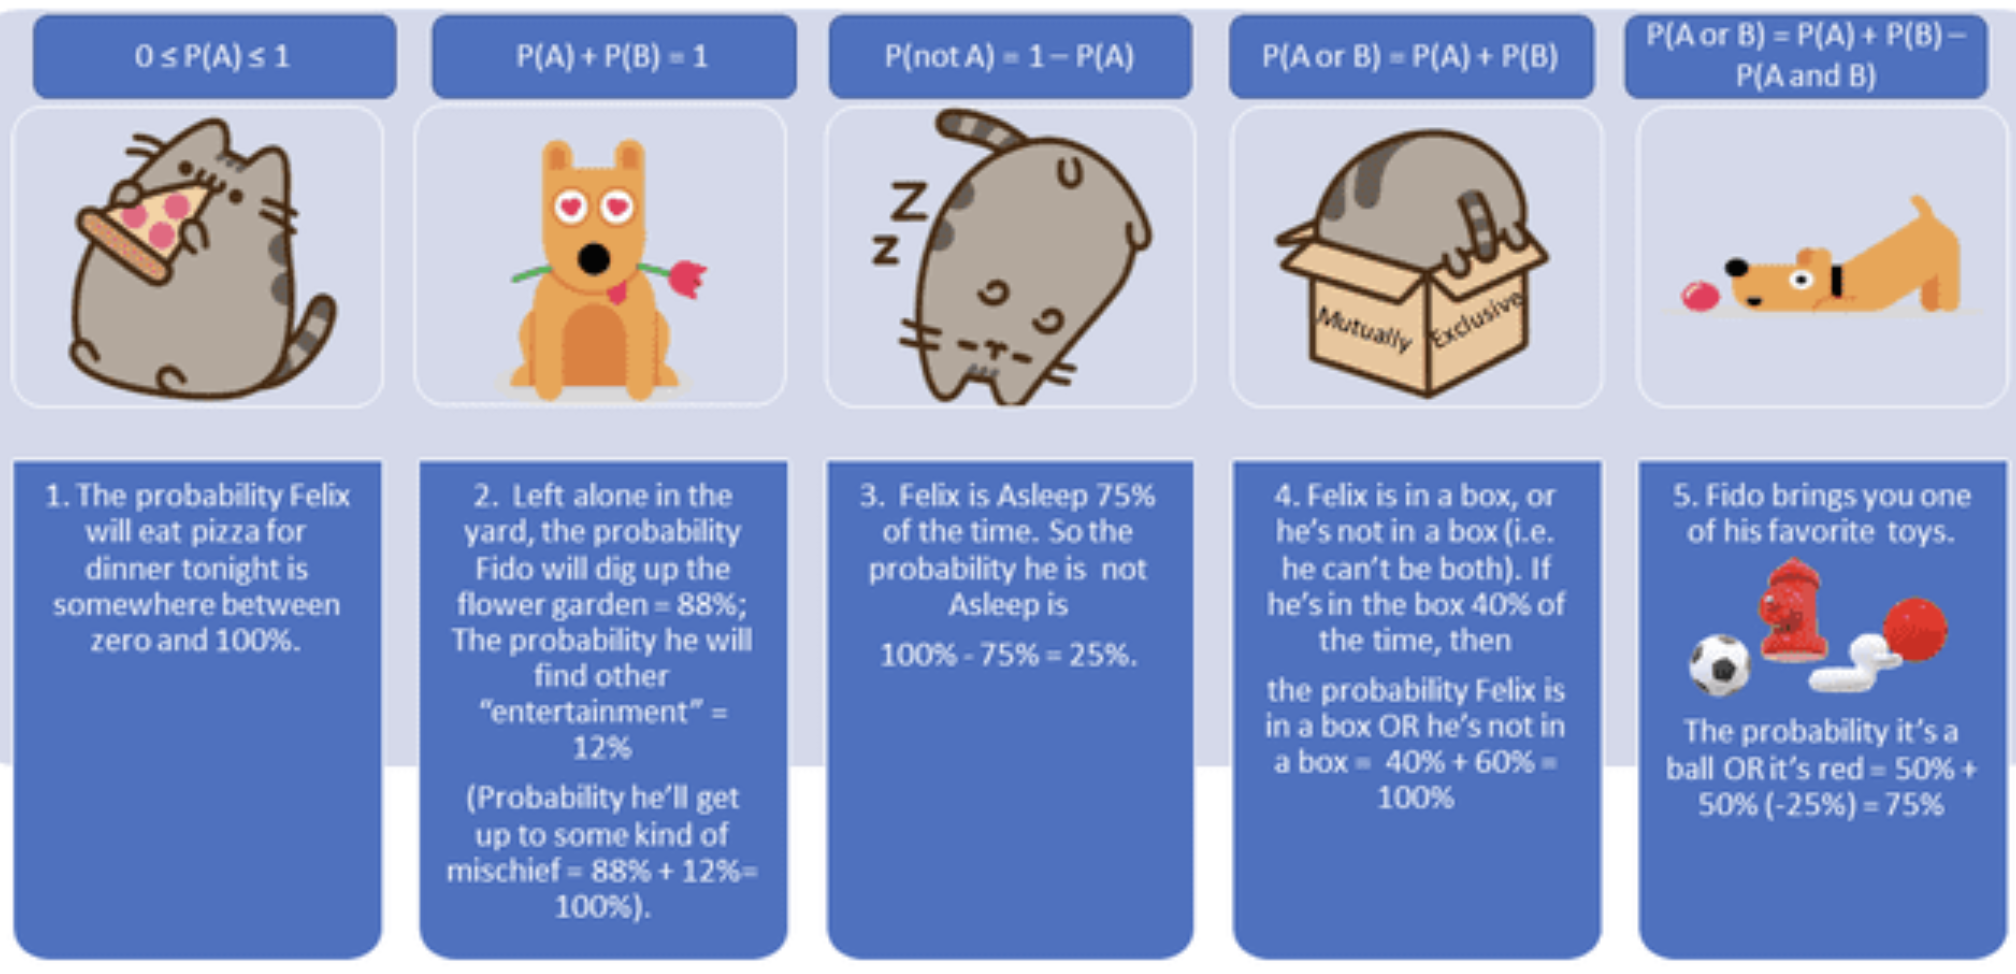

[<u>Data Science Central - A Community for Big Data Practitioners.</u>](https://www.datasciencecentral.com/5-rules-of-probability-in-one-picture/?scrlybrkr=8b05d911)

**<u>The General Addition Rule:</u>**

When two events A and B are **disjoint**, we can use the addition rule for disjoint events from the previous chapter:

> 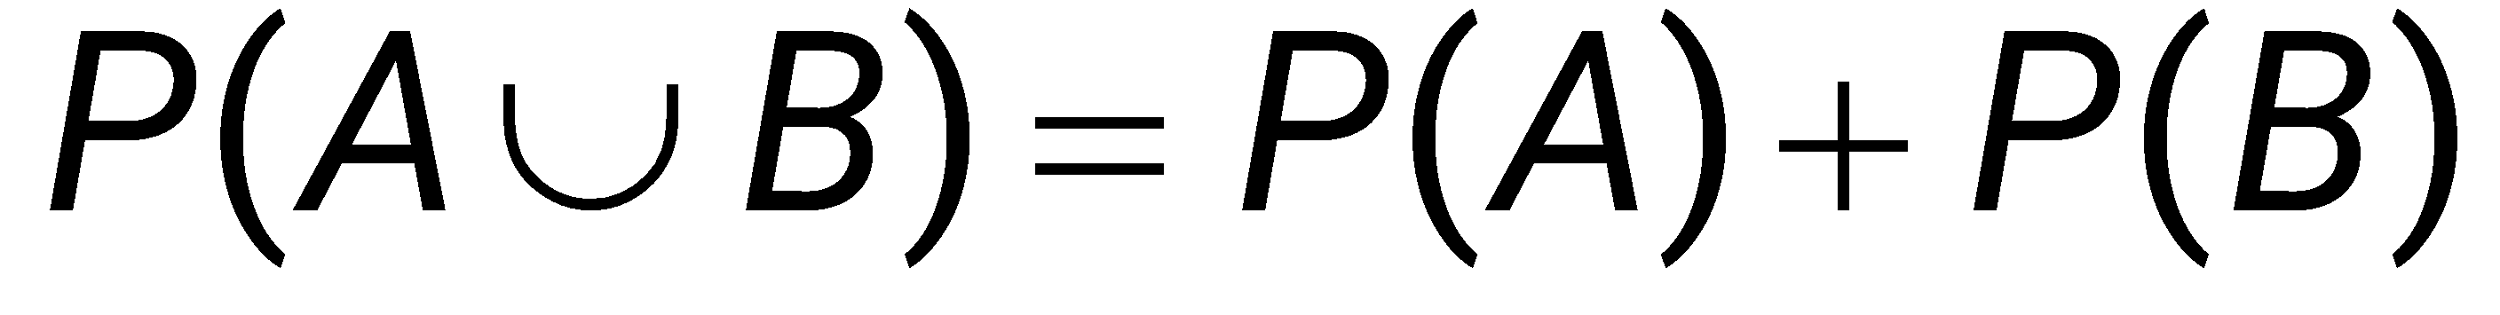

However, when our events are not disjoint, this earlier addition rule will *double count the probability of both A and B occurring*!

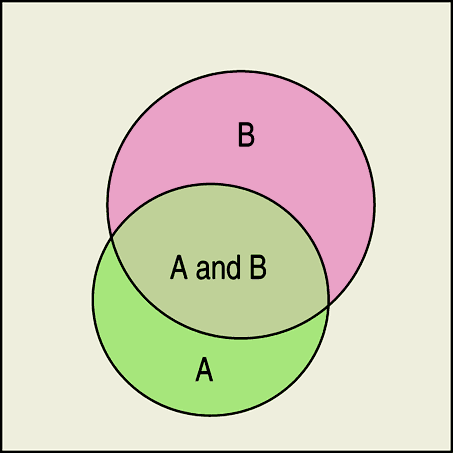

**General Addition Rule:**

For any two events A and B,

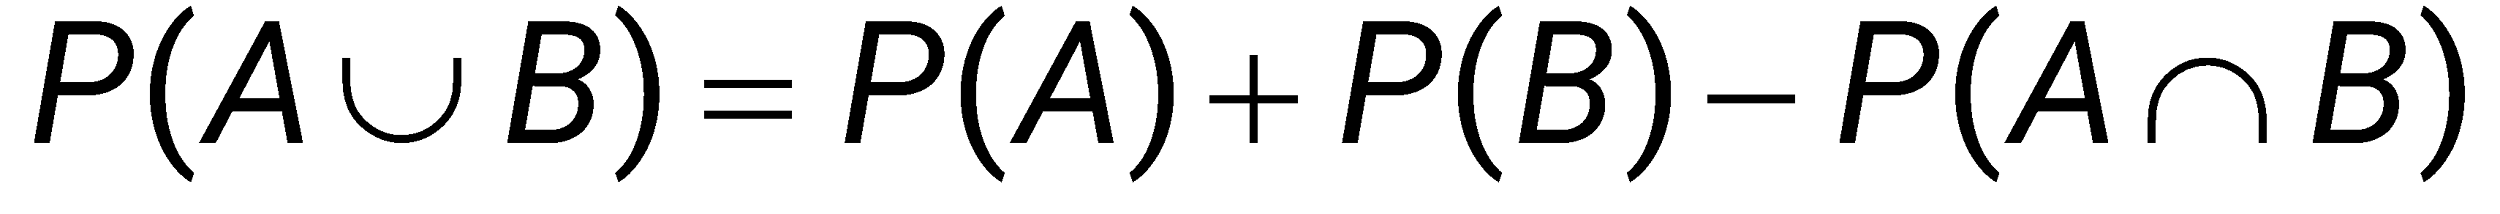.

<u>Example</u>: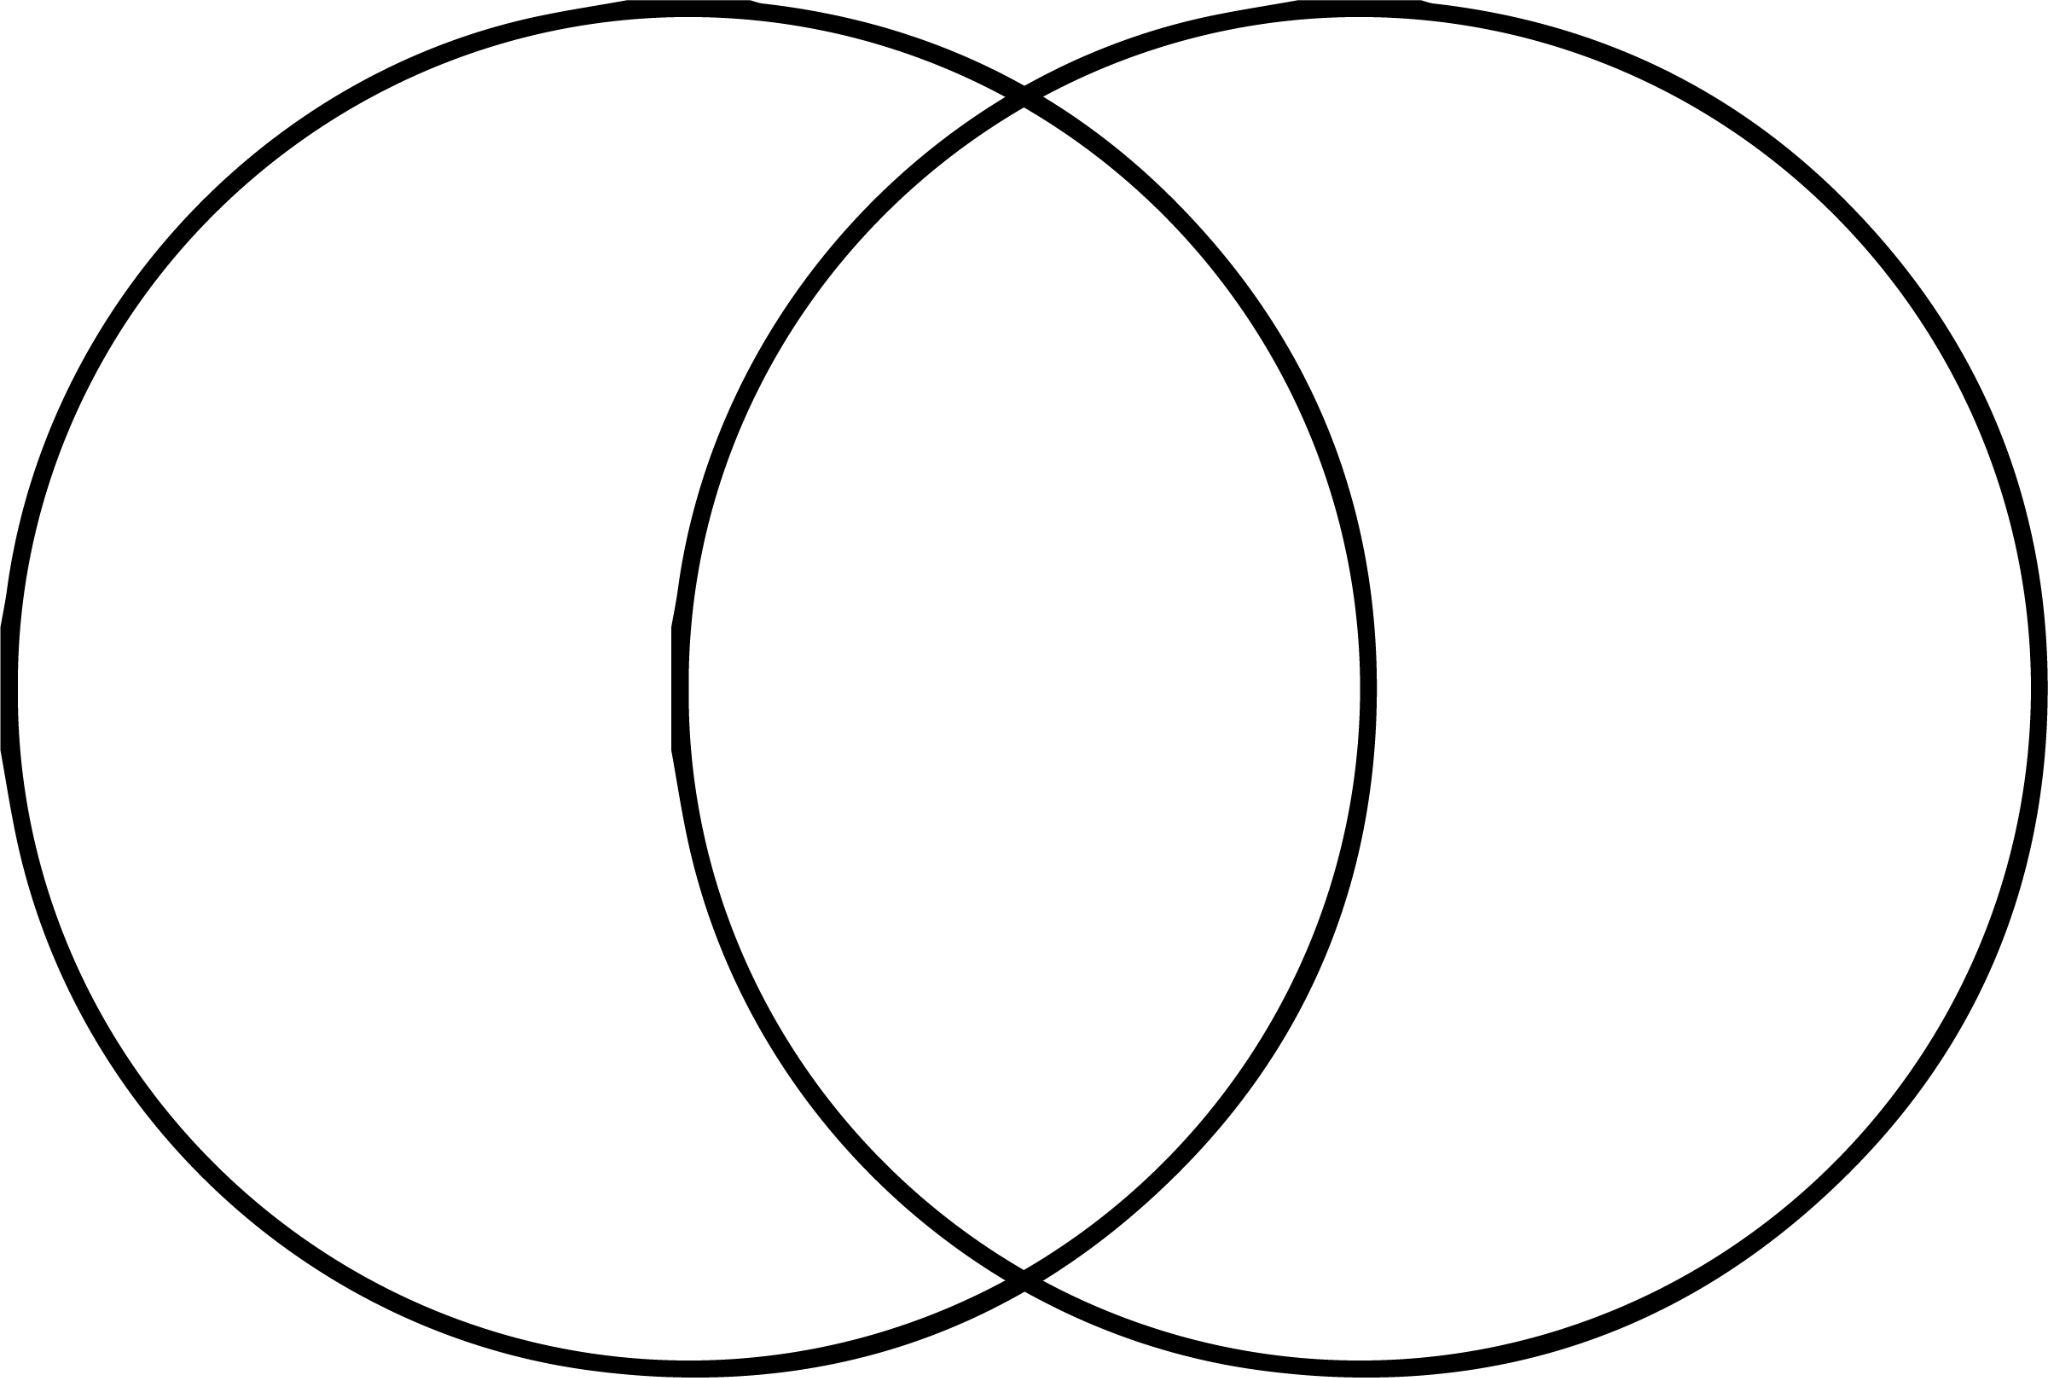

A survey of college students found that 56% live in a campus residence hall, 62% participate in a campus meal program, and 42% do both.

1.  What’s the probability that a randomly selected student either lives or eats on campus?

2.  What is the probability that a randomly selected student lives off campus and doesn’t have a meal program?

3.  What is the probability that a randomly selected student lives in a residence hall but doesn’t have a meal program?

**<u>Conditional Probability:</u>**

A probability that takes into account a given condition is called a **conditional probability**.

- **P(B\|A)** → “the probability of B given A”

- To find the probability of the event B given the event A, we restrict our attention to the outcomes in A. We then find in what fraction of those outcomes B also occurred.

> 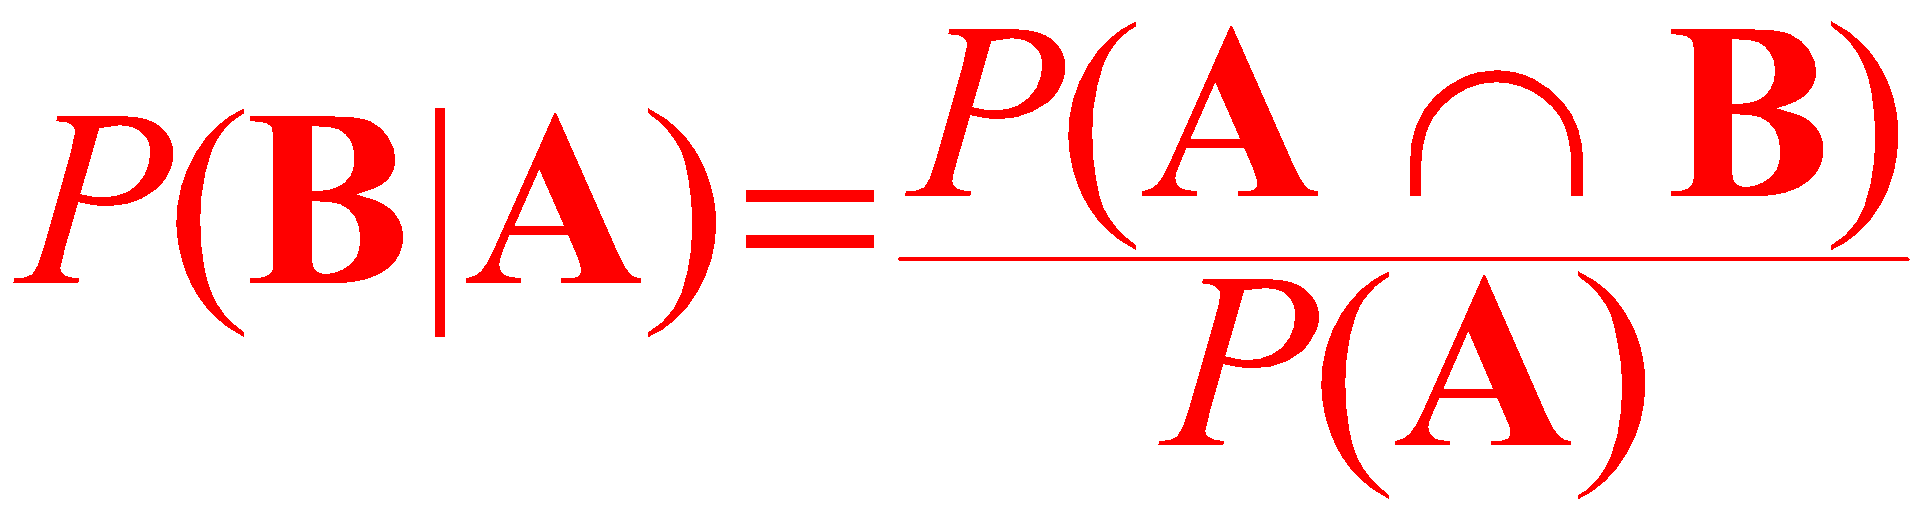

- **Note:** P(A) cannot equal 0, since we know that A has occurred.

<u>Example:</u>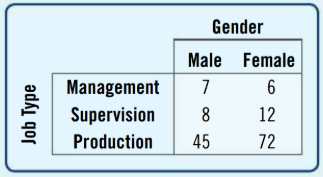

A company’s Office of Human Resources reports a breakdown of employees by job type and gender identity, as seen in the table. Suppose we select one employee at random.

a\) What’s the probability the employee is a male supervisor?

b\) What’s the probability a male employee is a supervisor?

(Hint: Restate the question using the word “given.”)

c\) What’s the probability that a supervisor identifies as male?

**<u>Independence:</u>**

<u>Recall:</u> **Independence** of two events means that the outcome of one event does not influence the probability of the other.

<u>Formal Definition:</u>

Events A and B are **independent** whenever **P(B\|A) = P(B)**.

(Equivalently, events A and B are independent whenever P(A\|B) = P(A).)

<u>Example:</u>

Back to living on campus…

Our survey told us that 56% of college students live on campus, 62% have a campus meal program, and 42% do both. Are living on campus and having a meal plan independent? Are they disjoint?

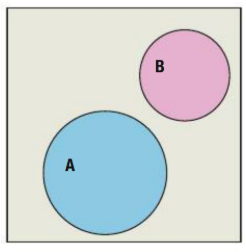

**<u>Independent</u>** $`\neq`$ **<u>Disjoint:</u>**

Suppose you select an adult at random from the U.S. population. Consider these two events:

- A = the person you select is a man.

- B = the person you select is pregnant.

<!-- -->

- Two events could be either independent or disjoint, but not both.

- And they could be neither disjoint nor independent.

**<u>Tables vs Venn Diagrams:</u>**

Drunk driving: 78% of suspect drivers get a breath test, 36% a blood test, and 22% both. Let’s use what we know to start a table: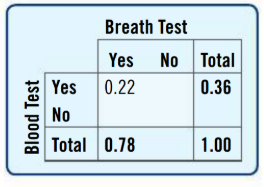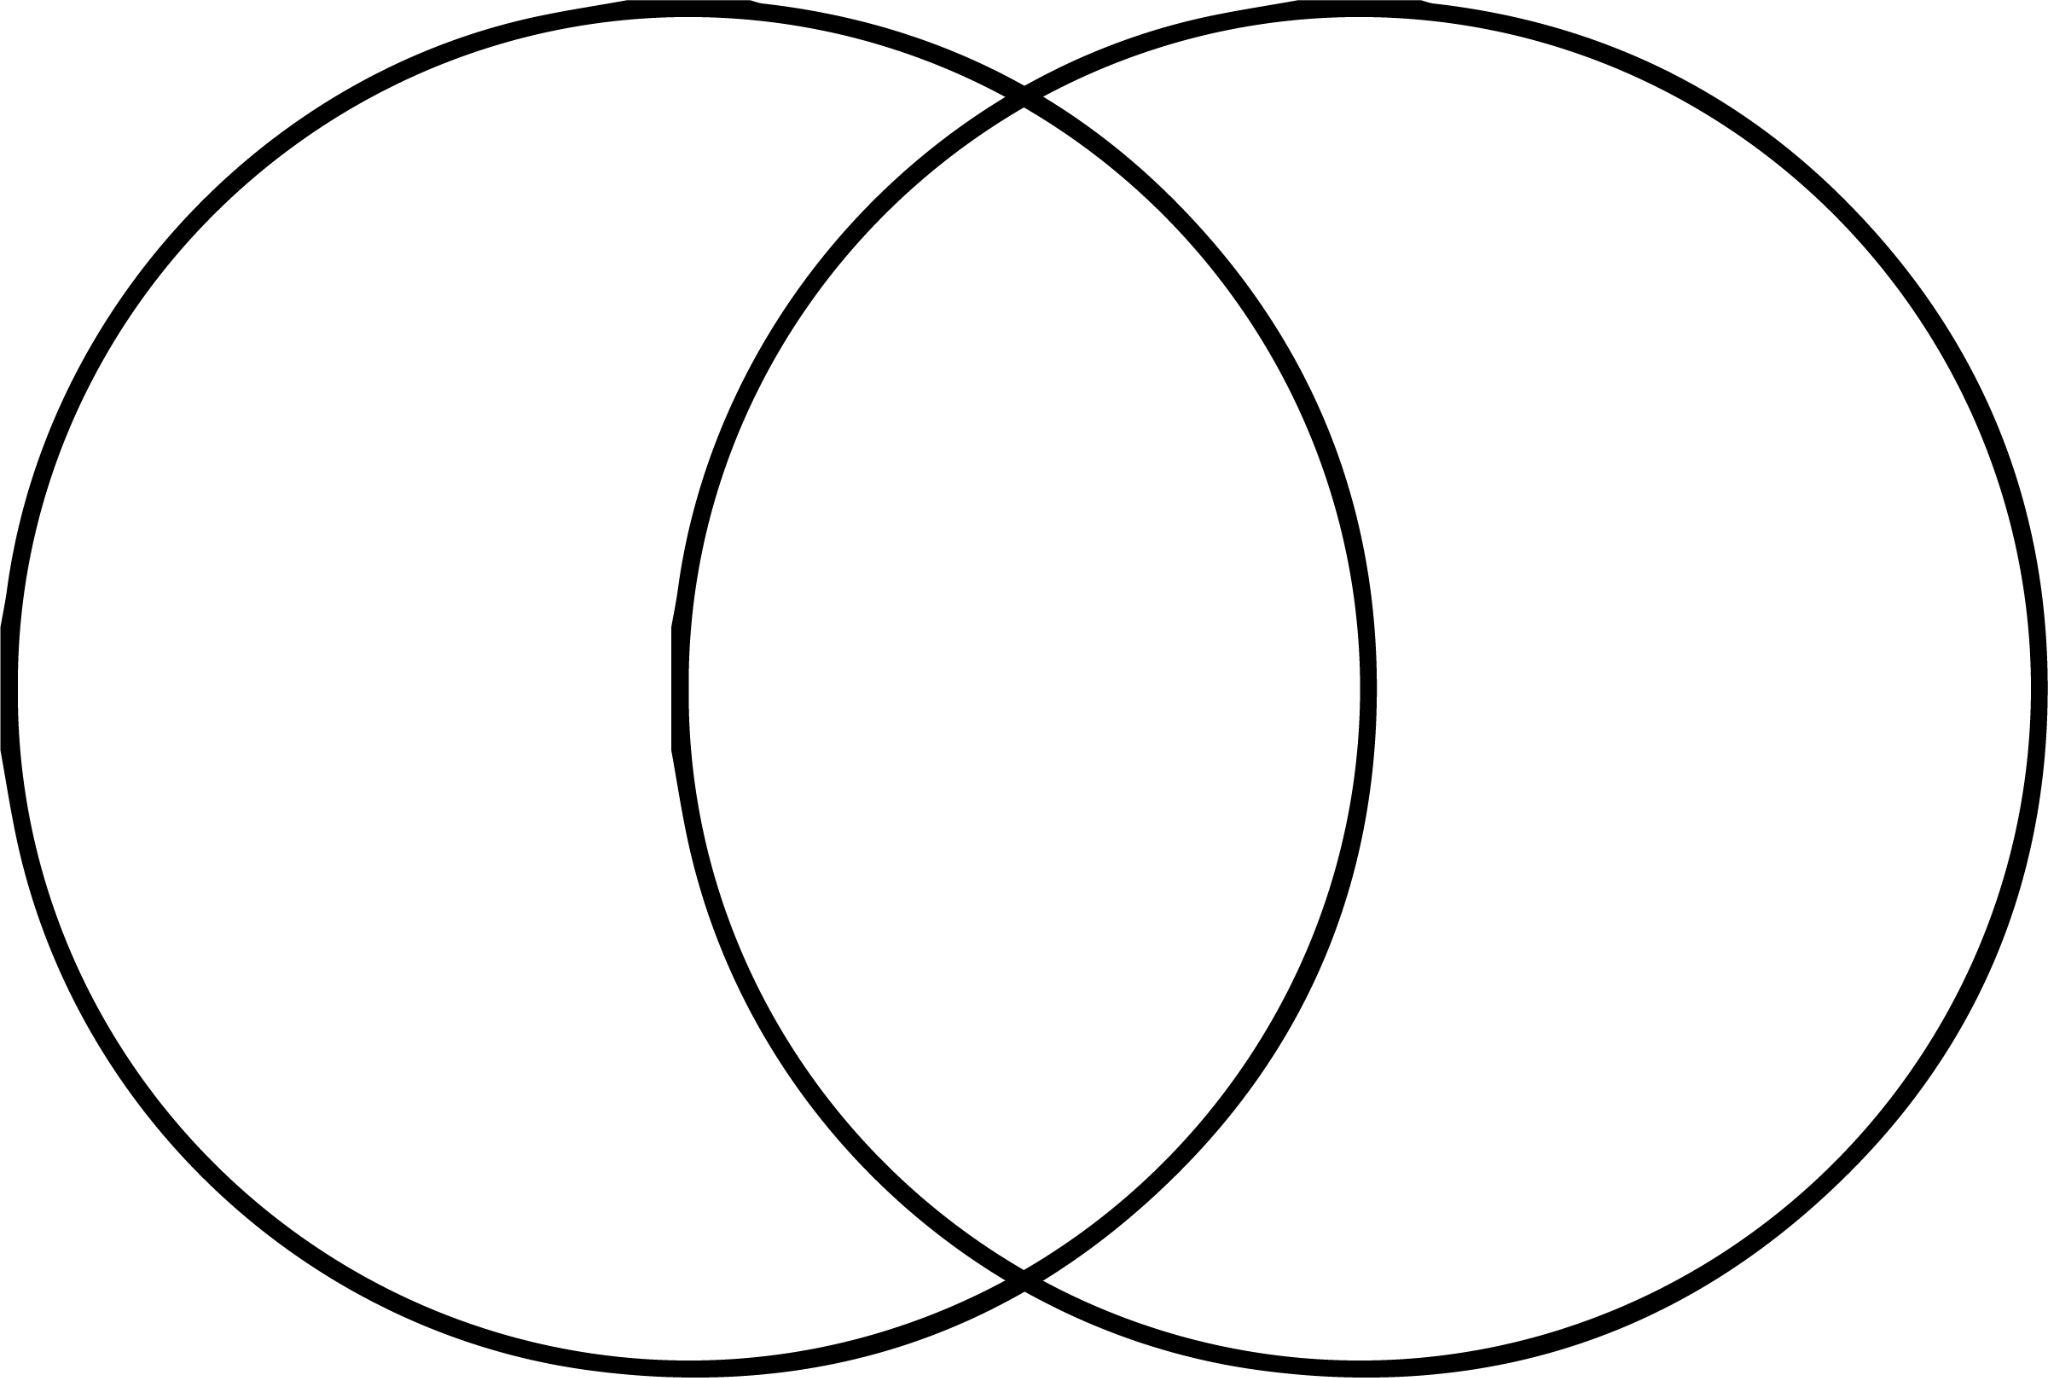

1\. Are giving a DWI (DUI) suspect a blood test and a breath test mutually exclusive?

2\. Are giving the two tests independent?


### Interactive Experiment: Visualizing Probability Rules

Use the tool below to explore how two events, **A** and **B**, interact.
*   **P(A)**: Probability of Event A happening.
*   **P(B)**: Probability of Event B happening.
*   **P(A and B)**: Probability of BOTH happening at the same time (Intersection).

The diagram helps you visualize:
*   **Union P(A or B):** Everything inside the circles.
*   **Intersection P(A and B):** The overlap.
*   **Conditional Probability P(A|B):** If we know we are in circle B, what portion of B is also A?


In [ ]:

import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import display, clear_output

def draw_venn(p_a, p_b, p_and):
    # Sanity checks
    if p_and > p_a or p_and > p_b:
        print("Error: Intersection P(A and B) cannot be greater than P(A) or P(B).")
        return
    if (p_a + p_b - p_and) > 1.0:
        print("Error: Union P(A or B) cannot be greater than 1.")
        return

    # Calculations
    p_only_a = p_a - p_and
    p_only_b = p_b - p_and
    p_neither = 1.0 - (p_only_a + p_only_b + p_and)
    p_or = p_a + p_b - p_and
    
    # Conditional Probabilities
    p_a_given_b = p_and / p_b if p_b > 0 else 0
    p_b_given_a = p_and / p_a if p_a > 0 else 0
    
    # Independence Check
    independent = abs(p_a_given_b - p_a) < 0.01

    # Visualizing
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.axis('off')
    
    # Draw Circles
    circle_a = patches.Circle((3.5, 3), 2, edgecolor='blue', facecolor='blue', alpha=0.3, label='A')
    circle_b = patches.Circle((6.5, 3), 2, edgecolor='red', facecolor='red', alpha=0.3, label='B')
    ax.add_patch(circle_a)
    ax.add_patch(circle_b)
    
    # Labels
    ax.text(2.5, 3, f"Only A\n{p_only_a:.2f}", ha='center', va='center', weight='bold')
    ax.text(7.5, 3, f"Only B\n{p_only_b:.2f}", ha='center', va='center', weight='bold')
    ax.text(5, 3, f"A & B\n{p_and:.2f}", ha='center', va='center', weight='bold')
    ax.text(5, 0.5, f"Neither: {p_neither:.2f}", ha='center')
    
    # Text Report
    report = (
        f"P(A) = {p_a:.2f}, P(B) = {p_b:.2f}\n"
        f"P(A or B) = {p_or:.2f}\n"
        f"P(A | B) = {p_a_given_b:.2f}\n"
        f"Independence Check: P(A|B) vs P(A)? {p_a_given_b:.2f} vs {p_a:.2f} -> {'Independent' if independent else 'Dependent'}"
    )
    ax.text(0, 5.5, report, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.8))
    
    plt.title('Venn Diagram Visualization')
    plt.show()

# Controls
style = {'description_width': 'initial'}
p_a_slider = widgets.FloatSlider(value=0.5, min=0, max=1.0, step=0.01, description='P(A):', style=style)
p_b_slider = widgets.FloatSlider(value=0.4, min=0, max=1.0, step=0.01, description='P(B):', style=style)
p_and_slider = widgets.FloatSlider(value=0.2, min=0, max=1.0, step=0.01, description='P(A and B):', style=style)

ui = widgets.VBox([p_a_slider, p_b_slider, p_and_slider])
out = widgets.interactive_output(draw_venn, {'p_a': p_a_slider, 'p_b': p_b_slider, 'p_and': p_and_slider})

display(ui, out)


**<u>The General Multiplication Rule:</u>**

When two events A and B are **independent**, we can use the multiplication rule for independent events.

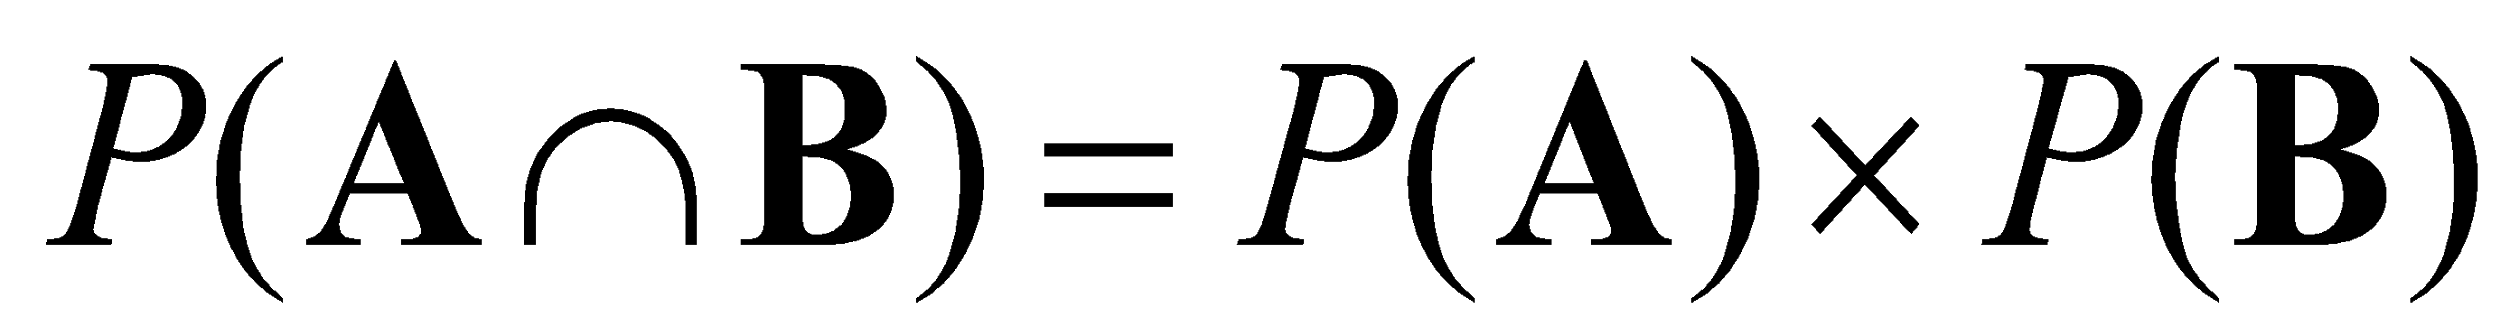

However, when our events are not independent, this earlier multiplication rule does not work.

**General Multiplication Rule:**

For any two events A and B,

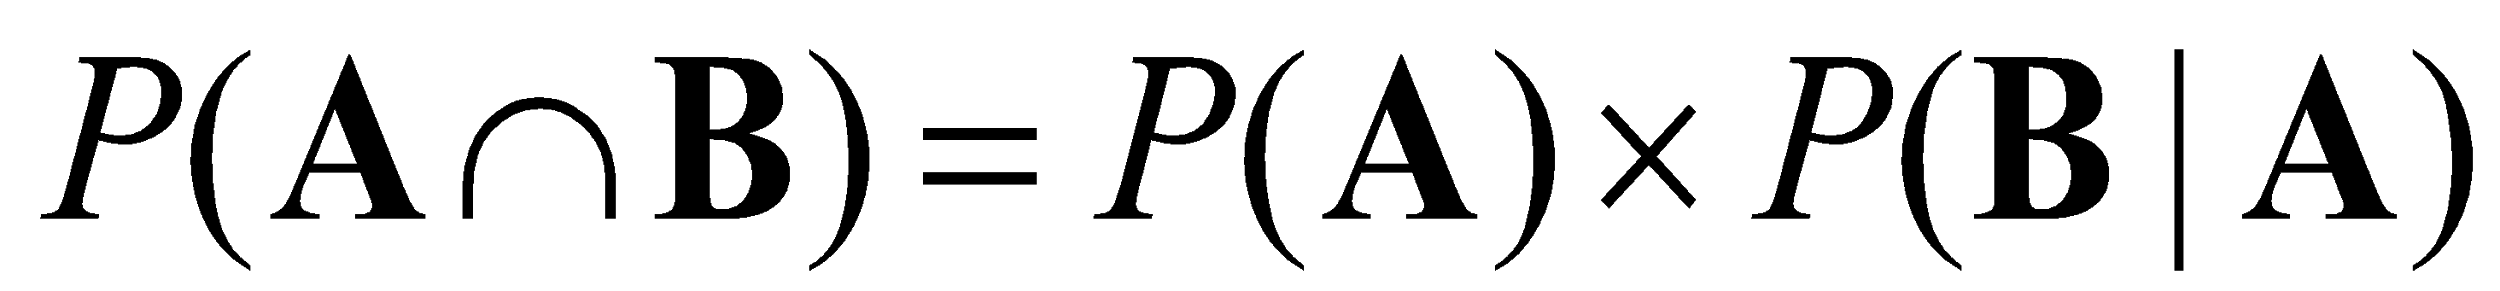

**OR**

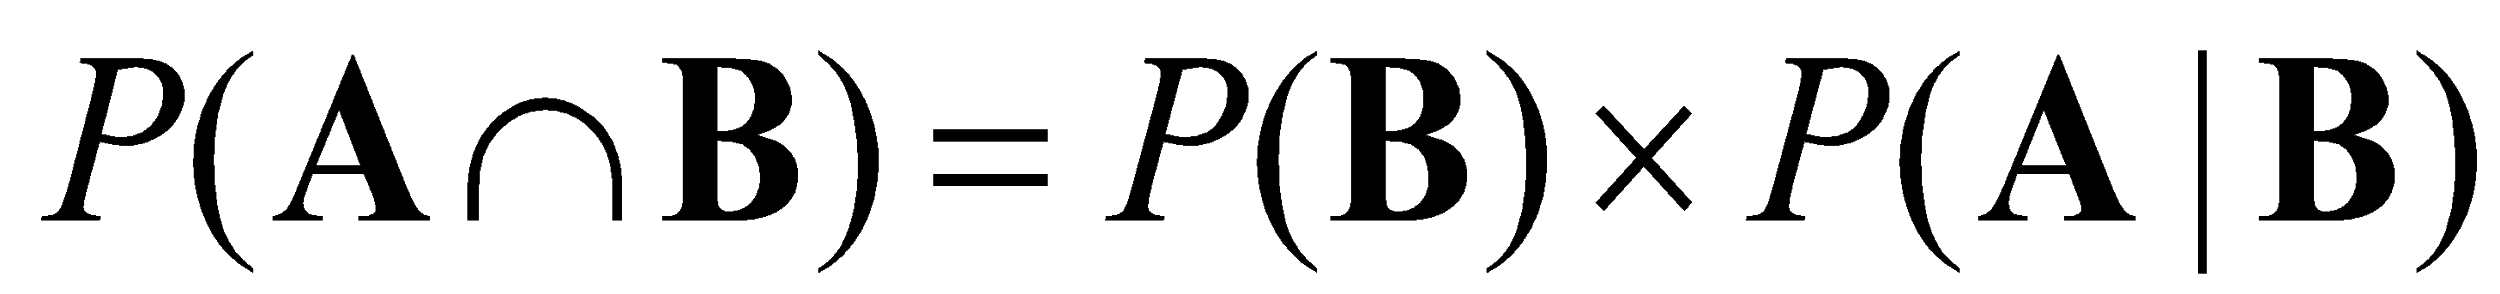

<u>Example:</u>

A factory produces two types of batteries, regular and rechargeable. Quality inspection tests show that 2% of the regular batteries come off the manufacturing line with a defect while only 1% of the rechargeable batteries have a defect. Rechargeable batteries make up 25% of the company’s production.

What’s the probability that if we choose one of the company’s batteries at random we get:

a\) a defective rechargeable battery?

b\) a regular battery and it’s not defective?

**<u>Drawing Without Replacement:</u>**

You just bought a small bag of Skittles. Not that you could know this, but inside are 20 candies: 7 green, 5 orange, 4 red, 3 yellow, and only 1 purple. You tear open one corner of the package and begin eating them by shaking out one at a time.

What’s the probability that:

1)  your first 2 Skittles are both orange?

2)  none of your first 3 candies is green?

**<u>Tree Diagrams:</u>**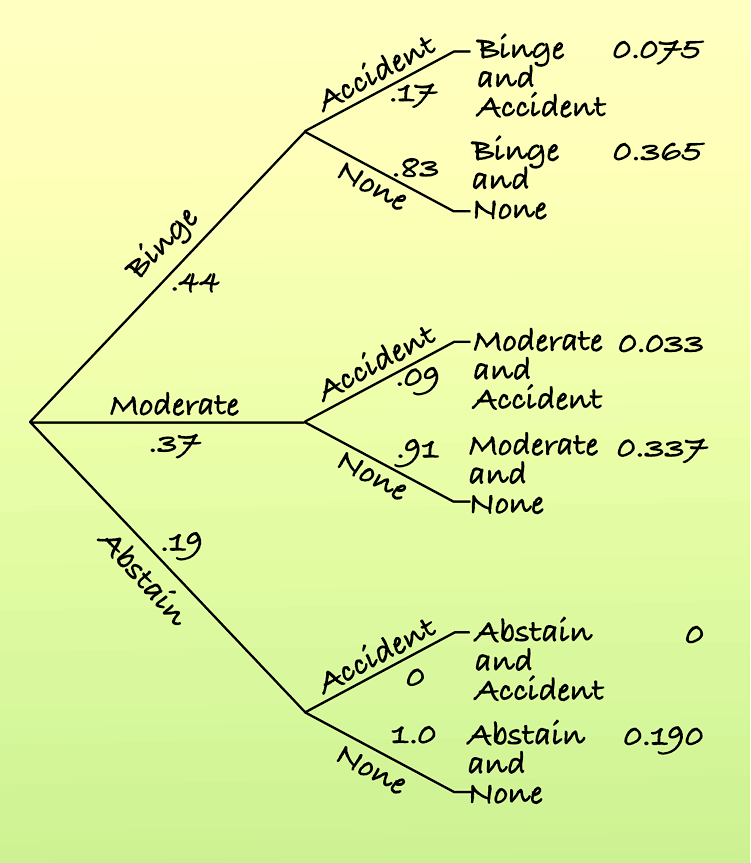

A **tree diagram** helps us think through conditional probabilities by showing sequences of events as paths that look like branches of a tree.

- This figure is a nice example of a tree diagram and shows how we multiply the probabilities of the branches together

- All the final outcomes are disjoint and must add up to one.

- We can add the final probabilities to find probabilities of compound events.

<u>Example:</u>

Let’s revisit the battery factory. Remember, it produced both regular and rechargeable batteries, with 25% of them rechargeable. Past history indicates that 2% of the regular batteries and 1% of the rechargeable batteries have some kind of defect. What’s the probability that a battery chosen at random from a shipment of this factory’s products turns out to be defective?